- Nama : Eko Putra Wahyuddin
- NIM : 221810259
- No Absen : 9
- Kelas : 3SD1
- Dosen : Ibnu Santoso SST, MT
- Mata Kuliah : Data Mining and Knowledge Management
- Hari/Tanggal : Selasa, 27 Oktober 2020

> ### "Saya menyatakan bahwa ujian ini saya kerjakan dengan juju sesuai kemampuan sendiri dan tidak mengutip sebagian atau seluruh pekerjaan orang lain. Jika suatu saat ditemukan saya melanggar ketentuan ujian, saya siap menerima konsekuensi yang berlaku”

TTD

Eko Putra Wahyuddin

# Neural Network With Python
## Import Library 

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Baca Data

In [16]:
df = pd.read_csv("parkinsons.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Dari tampilan diatas diketahui bahwa data terdiri dari 195 baris dan 24 kolom. Target kelasnya adalah kolom **status** yang bernilai 1 untuk orang yang menderita Parkinson's dan 0 untuk orang yang sehat. Kolom name tidak akan saya gunakan karena itu hanya berisi informasi nama/kode untuk subjek

## Preprocessing dan Explorasi Data

In [44]:
df = df.iloc[:, 1:]
df

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Cek Missing Value

In [51]:
df.isna().sum()

MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Terlihat bahwa tidak terdapat missing value pada data.

Pisah data menjadi feature class dan targat class. Feature class pada variabel `X` dan target class pada variabel `y`

In [45]:
X = df.drop(["status"], axis =1)
y = df['status']

#### Visualisasi Target Class

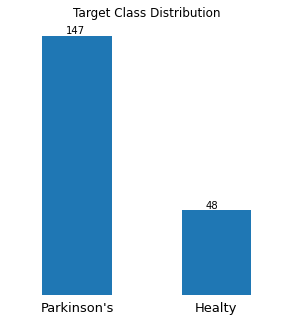

In [20]:
count = y.value_counts()
plt.figure(figsize=(5,5))
plt.title("Target Class Distribution")
ax = count.plot.bar()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(count):
    ax.text(i - 0.08, v + 1 , str(v))

for tick in ax.get_xticklines():
    tick.set_visible(False)
for tick in ax.get_yticklines():
    tick.set_visible(False)
    
ax.set_yticklabels([])
ax.set_xticklabels(["Parkinson's", "Healty"], rotation='horizontal', size = 13);

Dari Visualisasi tersebut terlihat bahwa data terdiri dari 147 orang yang terkena Parkinson's dan 48 yang sehat
#### Summary Feature Class

In [21]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Dari tabel diatas terlihat 5 Number Summary. Terlihat bahwa rata-rata dari 3 kolom pertama sangat berbeda jauh dengan kolom lainnya, sehingga perlu dilakukan scalling data agar 3 kolom pertama tidak membuat model menjadi bias.

#### MinMax Scaler

In [46]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.describe()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.193841,0.292748,0.144233,0.146083,0.126513,0.135389,0.126504,0.184126,0.162080,0.214063,...,0.129347,0.214101,0.077019,0.546410,0.564574,0.572963,0.412332,0.495783,0.426421,0.335549
std,0.186761,0.250564,0.154007,0.137636,0.142956,0.147855,0.142934,0.172147,0.160129,0.195554,...,0.129771,0.195527,0.128652,0.179865,0.242525,0.220456,0.197110,0.187758,0.170294,0.186649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066786,0.108323,0.056544,0.051383,0.047206,0.050375,0.047279,0.063584,0.052177,0.071167,...,0.045103,0.071222,0.016790,0.437170,0.384375,0.400291,0.273893,0.378364,0.300658,0.192433
50%,0.150411,0.223606,0.103558,0.090909,0.087669,0.094855,0.087494,0.122604,0.111750,0.158706,...,0.084769,0.158685,0.035045,0.554499,0.558550,0.589516,0.405738,0.478618,0.417393,0.309661
75%,0.249162,0.429160,0.180591,0.209486,0.151975,0.162647,0.151951,0.258764,0.217749,0.302677,...,0.170074,0.302703,0.079543,0.676034,0.772299,0.747391,0.527720,0.614472,0.539698,0.431709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Cek Korelasi

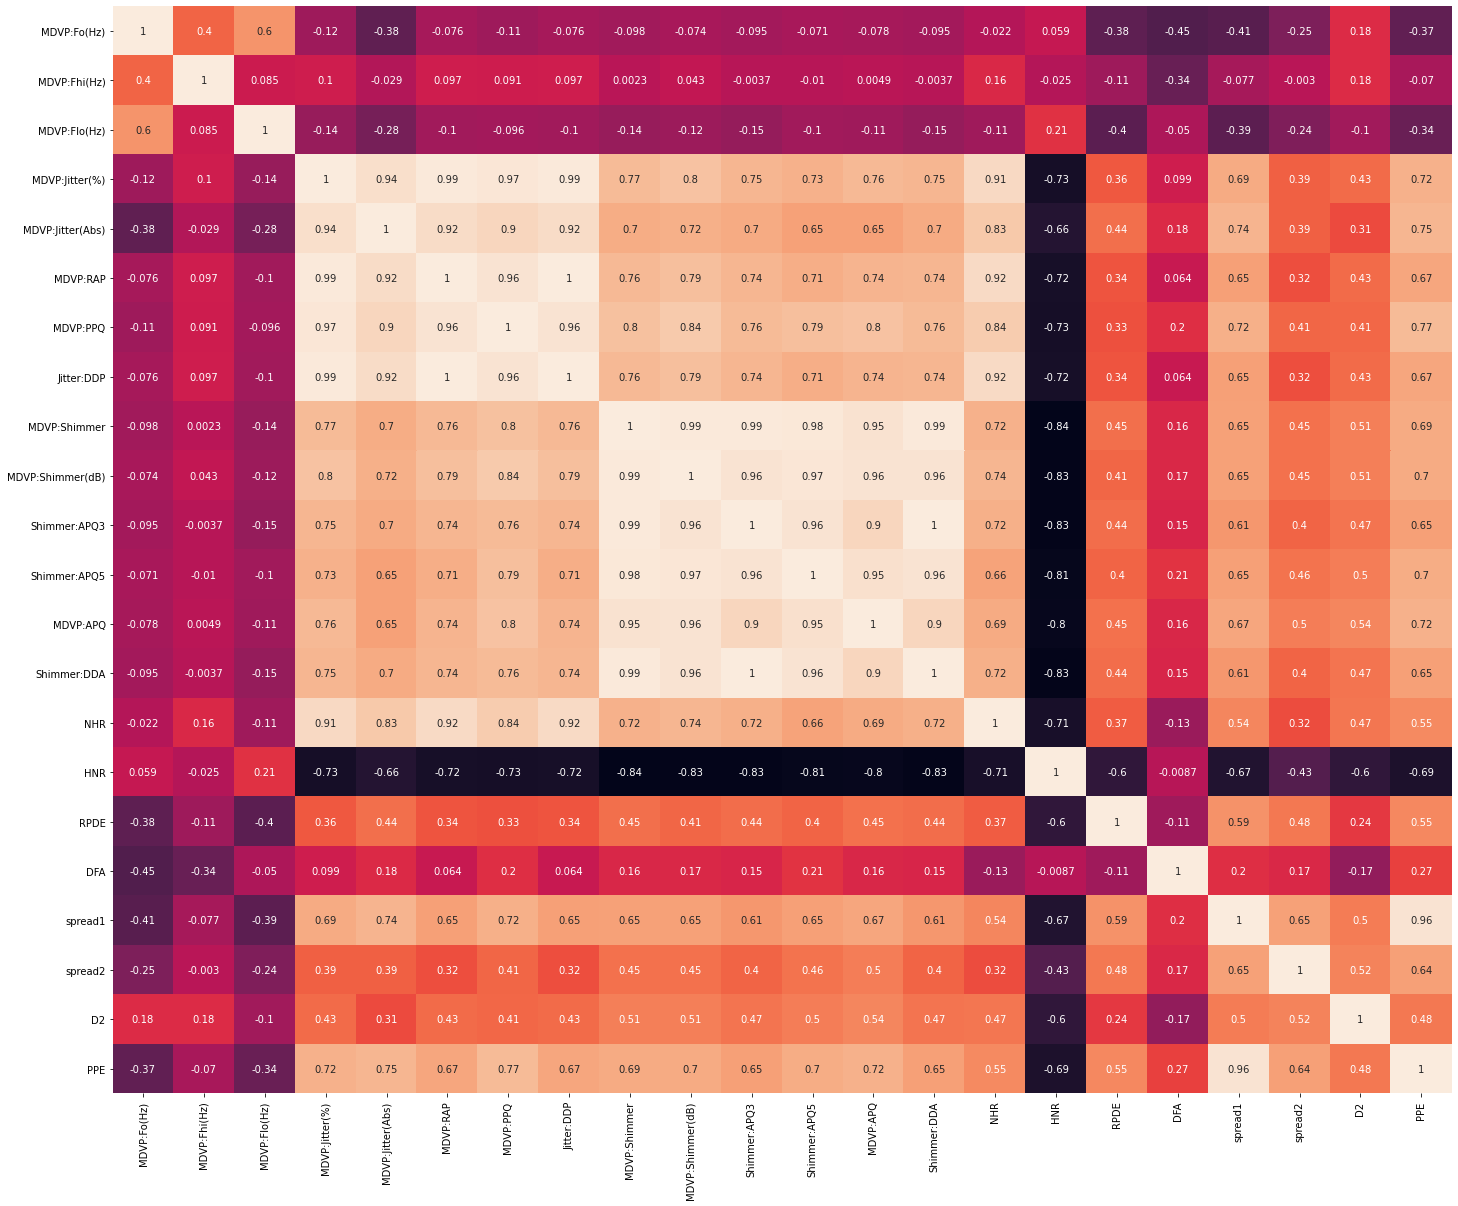

In [29]:
cor = X_scaled.corr()
plt.figure(figsize = (24,20))
ax = sns.heatmap(cor, annot = True, cbar=False)
plt.xticks(rotation = 90);

Terlihat bahwa kolom HNR memiliki nilai korelasi yang tinggi dengan hampir semua kolom lainnya. Oleh karena itu saya memutuskan untuk tidak menggunakan kolom HNR dalam pembuatan model

In [48]:
X_scaled = X_scaled.drop("HNR", axis = 1)
X_scaled.columns

Index(['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Buat Model

### Split Data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 0, train_size = 0.8)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  156  | Jumlah Test Data :  39


Saya membagi data menjadi 80% data training (156 baris) dan 20% data testing (39 baris)

Karena jumlah data yang lumayan sedikit maka saya memutuskan hanya menggunakan 5 hidden layer dimana setiap hidden layer memiliki 15 black box. Saya akan menggunakan 4 activation function, yaitu **relu, logistic, tanh, dan identity** dan membandingkan hasilnya

### Relu Activation Function

In [91]:
layer_size = [5, 10]
activation_function = "relu"

clf_relu = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function)
clf_relu.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[5, 10], random_state=0)

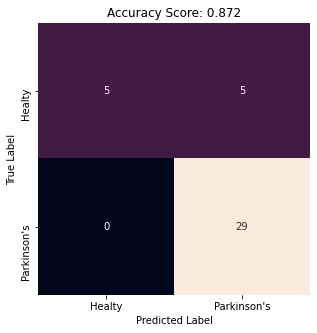

In [92]:
y_pred = clf_relu.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

target_names = ["Healty", "Parkinson's"]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square=True, cbar=False, xticklabels = target_names, yticklabels = target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Accuracy Score: {:.3}'.format(accuracy));

Dari confusion matrix diatas diperoleh accuracy model sebesar 0.872. Terlihat juga tidak terdapat kesalahan (FN) dalam memprediksi seseorang yang mengalami Parkinson, yang berarti recall dari model ini sebesar 1. Akan tetapi model ini masih salah  dalam memprediksi 5 orang yang sehat, sehingga precision sebesar 0.85. Sementara itu F1 score dari model ini sebesar 87%

In [93]:
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Healty       1.00      0.50      0.67        10
 Parkinson's       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



### Logistic Activation Function

In [96]:
layer_size = [5, 10]
activation_function = "logistic"

clf_log = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function)
clf_log.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=[5, 10], random_state=0)

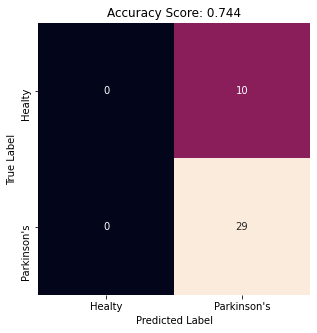

In [97]:
y_pred = clf_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

target_names = ["Healty", "Parkinson's"]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square=True, cbar=False, xticklabels = target_names, yticklabels = target_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Accuracy Score: {:.3}'.format(accuracy));

In [98]:
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Healty       0.00      0.00      0.00        10
 Parkinson's       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari confusion matrix diatas diperoleh accuracy model sebesar 0.744. Terlihat juga tidak terdapat kesalahan (FN) dalam memprediksi seseorang yang mengalami Parkinson, yang berarti recall dari model ini sebesar 1. Akan tetapi model ini masih sangat buruk dalam memprediksi sesorang yang sehat, semua testing data diprediksi Parkinson, sehingga precision sebesar 0.74. Sementara itu F1 score dari model ini sebesar 85%, 2% lebih dibawah dari model yang menggunakan activation function relu.

Sehingga dapat disimpulkan model dengan activation function relu lebih baik daripada model dengan activation function logistic. Untuk lebih meyakinkan saya akan membuat ROC Curve dari dua model tersebut.

### ROC Curve

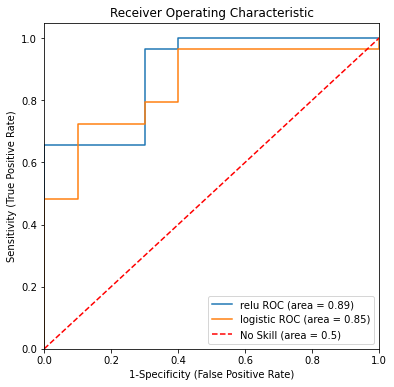

In [102]:
plt.figure(figsize = (6,6))
for act_function, model in zip(('relu', 'logistic'), (clf_relu, clf_log)):
    y_probs = model.predict_proba(X_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (act_function, auc))
    

plt.plot([0, 1], [0, 1],'r--', label='No Skill (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

Terlihat bahwa area under curve ddari relu lebih tinggi dari logistic

### Melihat Perbedaan Jika Jumlah Hidden Layer di Perbanyak

In [116]:
lstLayer = []
lstAccuracy = []
for hidden_layer in [1, 5, 10, 15, 20]:
    for black_box in [1, 10, 20]:
        layer_size = [hidden_layer, black_box]
        activation_function = "relu"
        
        clf_relu = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function)
        clf_relu.fit(X_train, y_train)
        
        y_pred = clf_relu.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        lstLayer.append("{} {}".format(hidden_layer, black_box))
        lstAccuracy.append(accuracy)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

In [120]:
pd.DataFrame({'layer' : lstLayer, 'accuracy' : lstAccuracy})

,layer,accuracy
0,1 1,0.692308
1,1 10,0.743590
2,1 20,0.743590
3,5 1,0.743590
4,5 10,0.871795
5,5 20,0.871795
6,10 1,0.794872
7,10 10,0.871795
8,10 20,0.871795
9,15 1,0.256410


Terlihat ternyata sakin banyak hidden layer dan black box maka semakin baik modelnya